In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
X_train_path = '../data/processed/X_train.csv'
X_test_path = '../data/processed/X_test.csv'
y_train_path = '../data/processed/y_train.csv'
y_test_path = '../data/processed/y_test.csv'

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path).squeeze()
y_test = pd.read_csv(y_test_path).squeeze()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeatures:", X_train.columns.tolist())

Training set shape: (121310, 10)
Test set shape: (30328, 10)

Features: ['PartyType_Code', 'Sobriety_Code', 'Age', 'PrimaryCollisionFactor_Code', 'CollisionType_Code', 'VehicleDamage_Code', 'MovementPrecedingCollision_Code', 'ViolationCode', 'CrashTime', 'Distance']


In [3]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

Accuracy Score: 0.6352545502505935
Confusion Matrix:
 [[13328  2398   785   147    37]
 [ 2189  4521  1471   259    67]
 [  881  1561  1191   256    78]
 [  178   271   246   153    48]
 [   33    59    50    48    73]]
Classification Report:
              precision    recall  f1-score   support

    NoInjury       0.80      0.80      0.80     16695
       Minor       0.51      0.53      0.52      8507
    Moderate       0.32      0.30      0.31      3967
      Severe       0.18      0.17      0.17       896
       Fatal       0.24      0.28      0.26       263

    accuracy                           0.64     30328
   macro avg       0.41      0.42      0.41     30328
weighted avg       0.63      0.64      0.63     30328



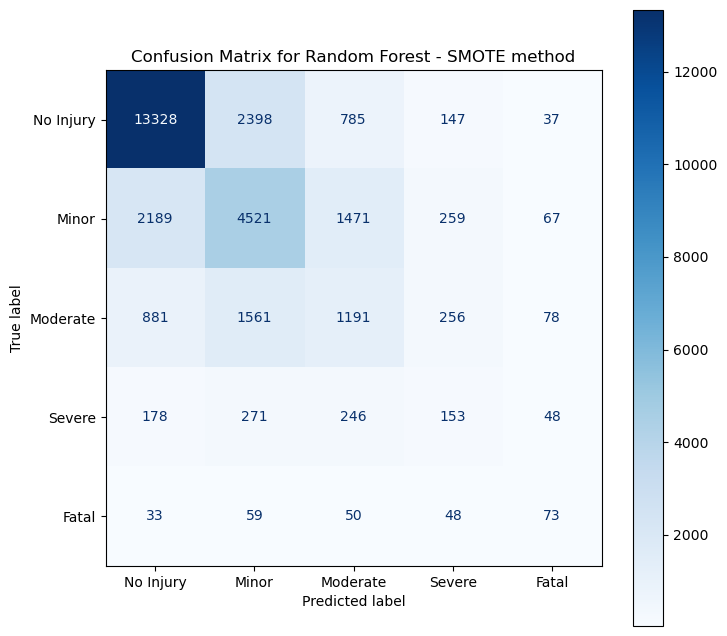

In [4]:
severity_mapping = {'NoInjury': 0, 'Minor': 1, 'Moderate': 2, 'Severe': 3, 'Fatal': 4}
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Injury', 'Minor', 'Moderate', 'Severe', 'Fatal'])
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix for Random Forest - SMOTE method')
plt.show()